In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from nltk.classify import NaiveBayesClassifier

In [2]:
# Importing the dataset
data_set = pd.read_csv("mbti_1.csv")
data_set.tail()

,type,posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


In [3]:
#Checking the dataset for missing values
data_set.isnull().any()

type     False
posts    False
dtype: bool

### Exploring the dataset¶

In [4]:
data_set.shape

(8675, 2)

In [5]:
#Explroing the posts in posts field
data_set.iloc[0,1].split('|||')

["'http://www.youtube.com/watch?v=qsXHcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
 'What has been the most life-changing experience in your life?',
 'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
 'May the PerC Experience immerse you.',
 'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
 "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
 '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-ho

In [6]:
#Finding the number of posts
len(data_set.iloc[1,1].split('|||'))

50

In [11]:
#Finding the unique vales from type of personality column
types = np.unique(np.array(data_set['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [7]:
#Finding the unique vales from type of personality column
total = data_set.groupby(['type']).count()*50
total

,posts
type,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


Text(0.5, 1.0, 'Total posts for each personality type')

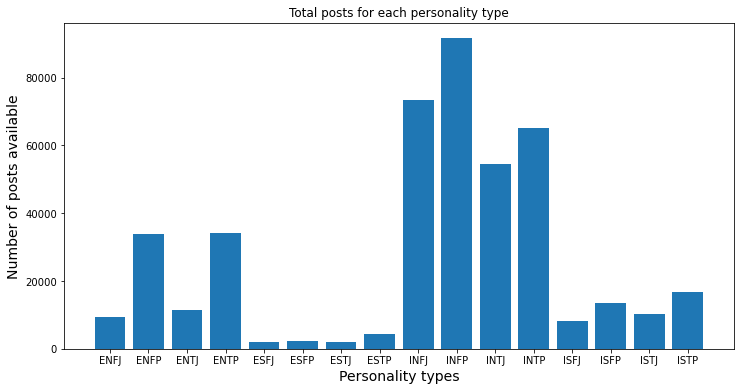

In [8]:
#Graphing it for better visualization
plt.figure(figsize = (12,6))

plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('Number of posts available', size = 14)
plt.title('Total posts for each personality type')

#### Organising the data to create a bag words model

In [12]:
#Segrating all the posts by their personality types and creating a new dataframe to store all this in
all_posts= pd.DataFrame()
for j in types:
    temp1 = data_set[data_set['type']==j]['posts']
    temp2 = []
    for i in temp1:
        temp2+=i.split('|||')
    temp3 = pd.Series(temp2)
    all_posts[j] = temp3

In [13]:
all_posts

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'https://www.youtube.com/watch?v=PLAaiKvHvZs,"'He doesn't want to go on the trip without me,...",'You're fired.,'I'm finding the lack of me in these posts ver...,'Why not?,'Edit: I forgot what board this was on.,this is such a catch 22,Splinter Cell Blacklist for Xbox 360.,'http://www.youtube.com/watch?v=qsXHcwe3krw,'I think we do agree. I personally don't consi...,"'Dear INTP, I enjoyed our conversation the o...",'Good one _____ https://www.youtube.com/wat...,'I love feeling affectionate for the one I lov...,'They paint without numbers,'Newton's Universal Gravity Law. I mean seriou...,'I got 593. From what I've read about the Enn...
1,51 :o,I'm still completely in AWE and I'm AMAZED tha...,That's another silly misconception. That appro...,Sex can be boring if it's in the same position...,Any other ESFJs originally mistype as an NFP? ...,I am currently reading 'Artemis Fowl: The Eter...,"I'm here! Although, I'm quite the terrible EST...",ESTPs are generally well liked. If you get hat...,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,Literature... I'd suggest 'Everyday Zen' by Ch...,"Dear ENTJ sub, Long time no see. Sincerely,...","Of course, to which I say I know; that's my bl...",Kind of an update on my past post above. Whate...,I'd guess at istp too,"Well, if money and time was no object, I would...",GTFO FEELER!
2,I went through a break up some months ago. We ...,"Thanks, everyone. I'm struggling with being se...",But guys... he REALLY wants to go on a super-d...,Giving new meaning to 'Game' theory.,Hello again. Thanks for all your help. I know ...,"Hi all, if you've got some spare time and why ...",Yikes. I do not want power...,I often come off to people with the opposite o...,enfp and intj moments https://www.youtube.com...,Being emotional doesn't automatically make som...,None of them. All other types hurt in deep exi...,Does being absolutely positive that you and yo...,It feels weird being in love for the first tim...,"My best bud is ESFP, very funny, entertaining ...",http://www.oglaf.com/media/comic/failsafe.jpg,A lot of the stuff that you read in the INTP d...
3,ENFJ Puns so many puns.,My husband works an extra job each year to pay...,Never mind. Just go on permanent vacation.,Hello *ENTP Grin* That's all it takes. Than w...,"Of the J functions, I'd say it would be: Fi>Ti...",BABYMETAL are the best band of this decade ht...,Thank you SO SO much. This is what I had plann...,Ask her what you are to her.,What has been the most life-changing experienc...,"I'm a Ch'an Buddhist, so it's a daily thing fo...",Probably a sliding scale that depends on indiv...,"No, I didn't; thank you for a link!",Unsure if i completely understand the question...,"I used to smoke weed alot, everyday from morni...",I'm still laughing! xD http://www.youtube.com...,Don't worry about it. You are trying to make ...
4,Well I personally don't go that much for attra...,He said that it's not like he's asking me to d...,Two months? I wouldn't be crazy about the idea...,This + Lack of Balance and Hand Eye Coordination.,The ESFJs on this site are lovely. I'm general...,Banned for being a fire hazard.,Hi,I'm a euphonium player and a writer,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,"Glad to know I'm not the only one. I meditate,...",Draco Malfoy also. I'd say he's either 358 or ...,So-called Ti-Si loop (and it can stem from any...,"Not often, but I tend to lose it more when it ...",Jimi Hendrix - The Wind Cries Mary. After all...,"workaround is working for me, and I'm using FF...",My mother-in-law is an ESTJ. She is the epito...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,I am VERY particular. And I have not dated cer...,'Very true. The thing is to recognize and ove...,"Um, totally off ROFL. I am female, 30, no opin...",Actually I was none of these labels of alpha o...,NaN,NaN,NaN,NaN,"'So, hey everyone, me again. :happy: I want t...","Fa

In [14]:
#Creating a function to tokenize the words
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)
def build_bag_of_words_features_filtered(words):
    words = nltk.word_tokenize(words)
    return {
        word:1 for word in words \
        if not word in useless_words}

In [15]:
#A random check of the function
build_bag_of_words_features_filtered(all_posts['INTJ'].iloc[1])

{'Dear': 1,
 'ENTJ': 1,
 'sub': 1,
 'Long': 1,
 'time': 1,
 'see': 1,
 'Sincerely': 1,
 'Alpha': 1}

In [17]:
#Creating an array of features
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    features += [[(build_bag_of_words_features_filtered(i), j) \
    for i in temp1]]

In [18]:
# Because each number of personality types have different number of posts they must be splitted accordingle. Taking 80% for training and 20% for testing
split=[]
for i in range(16):
    split += [len(features[i]) * 0.8]
split = np.array(split,dtype = int)

In [19]:
split

array([7430, 7430, 7430, 7430, 1614, 1772, 1536, 3469, 7430, 7430, 7430,
       7430, 6496, 7430, 7430, 7430])

In [20]:
#Data for training
train=[]
for i in range(16):
    train += features[i][:split[i]]

In [22]:
#Training the model
sentiment_classifier = NaiveBayesClassifier.train(train)

In [23]:
#Testing the model on the dataset it was trained for accuracy
nltk.classify.util.accuracy(sentiment_classifier, train)*100

43.92808718962502

In [24]:
#Creating the test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [25]:
#Testing the model on the test dataset which it has never seen before
nltk.classify.util.accuracy(sentiment_classifier, test)*100

10.429168563506188

The model performs at efficieny of only 10% which is pretty bad.
Hence, instead of selecting all 16 types of personalitys as a unique feature I explored the dataset further and decided to simplify it.


The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

Introversion (I) – Extroversion (E)
Intuition (N) – Sensing (S)
Thinking (T) – Feeling (F)
Judging (J) – Perceiving (P)

We will use this and create 4 classifyers to classify the person

#### Creating a classifyer for Introversion (I) and Extroversion (E)

In [26]:
# Note: The details for the steps over here are same as the ones while creating the model above, hence I will only explain the changes
# Features for the bag of words model
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('I' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'introvert') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'extrovert') \
        for i in temp1]]

In [27]:
# Data for training
train=[]
for i in range(16):
    train += features[i][:split[i]]

In [28]:
#Training the model
IntroExtro = NaiveBayesClassifier.train(train)

In [29]:
#Testing the model on the dataset it was trained for accuracy
nltk.classify.util.accuracy(IntroExtro, train)*100

80.76528975232102

#### Seeing that this model has good somewhat good results, I shall repeat the same with the rest of the traits

### Creating a classifyer for Intuition (N) and Sensing (S)

In [31]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('N' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Intuition') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Sensing') \
        for i in temp1]]
        
#Data for training

train=[]
for i in range(16):
    train += features[i][:split[i]]
    
#Training the model
IntuitionSensing = NaiveBayesClassifier.train(train)

# Testing the model 
nltk.classify.util.accuracy(IntuitionSensing, train)*100

# Creating the test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

#Testing the model
nltk.classify.util.accuracy(IntuitionSensing, test)*100


54.433447788325594

### Creating a classifyer for Thinking (T) and Feeling (F)

In [33]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('T' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Thinking') \
        for i in temp1]]
    if('F' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Feeling') \
        for i in temp1]]

In [34]:
train=[]
for i in range(16):
    train += features[i][:split[i]]

In [35]:
ThinkingFeeling = NaiveBayesClassifier.train(train)

In [36]:
nltk.classify.util.accuracy(ThinkingFeeling, train)*100

79.63194882888105

In [37]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [38]:
nltk.classify.util.accuracy(ThinkingFeeling, test)*100

59.47523072466168

### Creating a classifyer for Judging (J) and Percieving (P)

In [39]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('J' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Judging') \
        for i in temp1]]
    if('P' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Percieving') \
        for i in temp1]]

In [40]:
train=[]
for i in range(16):
    train += features[i][:split[i]]

In [41]:
JudgingPercieiving = NaiveBayesClassifier.train(train)

In [42]:
nltk.classify.util.accuracy(JudgingPercieiving, train)*100

79.38458035335397

In [43]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [44]:
nltk.classify.util.accuracy(JudgingPercieiving, test)*100

54.38480321152175

### Summarizing the results of the models


In [47]:
temp = {'train' : [81.12443979837917,70.14524215640667,80.03456948570128,79.79341109742592], 'test' : [58.20469312585358,54.46262259027357,59.41315234035509,54.40549600629061]}


In [49]:
results = pd.DataFrame.from_dict(temp, orient='index', columns=['Introvert - Extrovert', 'Intuition - Sensing', 'Thinking - Feeling', 'Judging - Percieiving'])


In [51]:
results

,Introvert - Extrovert,Intuition - Sensing,Thinking - Feeling,Judging - Percieiving
train,81.124440,70.145242,80.034569,79.793411
test,58.204693,54.462623,59.413152,54.405496


Text(0.5, 1.0, 'Total posts for each personality type')

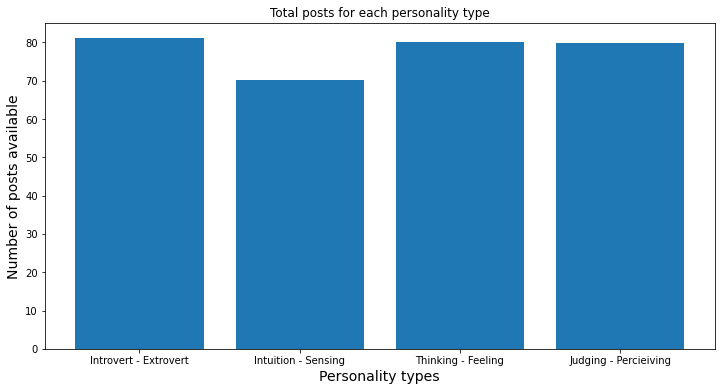

In [52]:
# Plotting the results for better appeal
plt.figure(figsize = (12,6))

plt.bar(np.array(results.columns), height = results.loc['train'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('Number of posts available', size = 14)
plt.title('Total posts for each personality type')

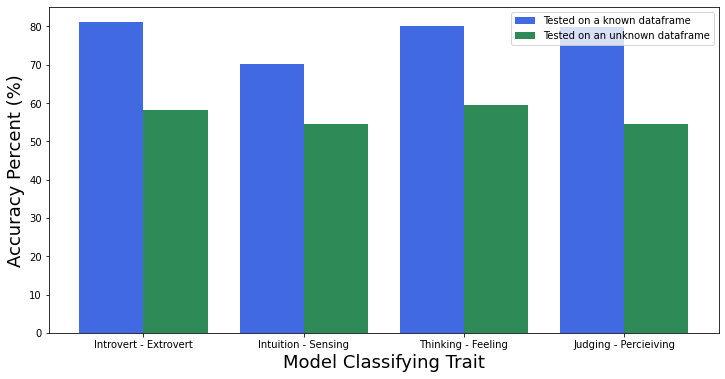

In [53]:
labels = np.array(results.columns)

training = results.loc['train']
ind = np.arange(4)
width = 0.4
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, training, width, color='royalblue')

testing = results.loc['test']
rects2 = ax.bar(ind+width, testing, width, color='seagreen')

fig.set_size_inches(12, 6)
fig.savefig('Results.png', dpi=200)

ax.set_xlabel('Model Classifying Trait', size = 18)
ax.set_ylabel('Accuracy Percent (%)', size = 18)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels)
ax.legend((rects1[0], rects2[0]), ('Tested on a known dataframe', 'Tested on an unknown dataframe'))
plt.show()